# Predict within-author loanword use
Let's look at within-author loanword use.

If we see that an author shares music link X at time $t$, will they be more likely to use an integrated loanword after sharing it?

In [25]:
import pandas as pd
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_helpers import clean_date_values
# load full loanword data
loanword_post_data = pd.read_csv('../../data/mined_tweets/loanword_verb_posts_CLUSTER=twitter_posts_STARTDATE=2017_7_9_ENDDATE=2019_4_6.tsv', sep='\t')
loanword_extra_post_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives_extra_loanword_tweets.gz', sep='\t', compression='gzip')
author_var = 'screen_name'
loanword_post_data.rename(columns={'user_screen_name' : author_var}, inplace=True)
# loanword_post_data = loanword_post_data.assign(**{
#     author_var : loanword_post_data.loc[:, author_var] + loanword_post_data.loc[:, 'user_screen_name']
# })
loanword_post_data = pd.concat([loanword_post_data, loanword_extra_post_data], axis=0)
loanword_post_data = loanword_post_data.assign(**{
    author_var : loanword_post_data.loc[:, author_var].apply(lambda x: x.lower())
})
loanword_post_data.fillna('', inplace=True)
loanword_post_data = clean_date_values(loanword_post_data)
print(loanword_post_data.shape[0])

91885


How many authors have more than 1 loanword post?

535 authors with >=3 posts


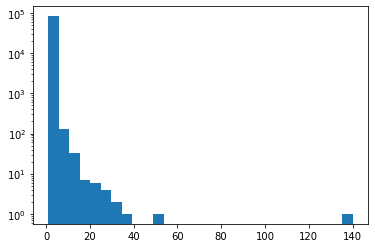

In [27]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
author_var = 'screen_name'
author_post_counts = loanword_post_data.loc[:, author_var].value_counts()
min_count = 3
print('%d authors with >=%d posts'%(len(author_post_counts[author_post_counts>min_count]), min_count))
N_bins = len(set(author_post_counts))
plt.hist(author_post_counts, bins=N_bins)
plt.yscale('log')
plt.show()

This is not much. What is the average date range for the authors?

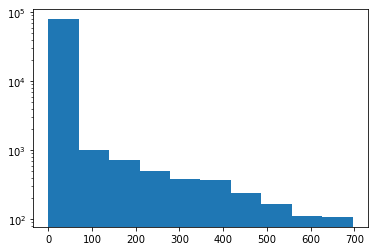

In [33]:
date_var = 'clean_date'
author_date_ranges = loanword_post_data.groupby(author_var).apply(lambda x: (x.loc[:, date_var].max() - x.loc[:, date_var].min()).days)
plt.hist(author_date_ranges)
plt.yscale('log')
plt.show()

Most authors have a short time span between posts, with a long tail of stragglers.

In [55]:
# get full media sharing data
# author_media_share_data = pd.read_csv('../../data/mined_tweets/author_media_link_data.tsv', sep='\t')
author_video_share_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives_youtube_video_categories.tsv', sep='\t')
author_music_share_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives_author_spotify_link_data.tsv', sep='\t')
display(author_video_share_data.head())
display(author_music_share_data.head())


,id,youtube_id,clean_date,youtube_id_category,screen_name
0,1116579616578101249,2B6qerZlczw,2019-04-12 01:51:40,us_american_artist,07jun11
1,1104125307802533889,s_a1hPwXiWw,2019-03-08 16:02:41,us_american_artist,07jun11
2,1142668962427260929,EoXvDleWJ5U,2019-06-23 01:41:25,us_american_artist,13mae13
3,1134283202556829696,44_qWFAdjqQ,2019-05-30 22:19:24,us_american_artist,13mae13
4,1079330427595378689,yWEK4v9AVKQ,2018-12-30 05:56:41,us_american_artist,17_siete


,latin_american_genre,us_american_genre,track_id,artist_id,screen_name,clean_date
0,False,True,5LO0sJCkNMZYLYeGOvblLu,1Yox196W7bzVNZI7RBaPnf,aneuroma,2019-06-17 17:28:38
1,False,True,0TSEl91K02zqF77VMexAiV,1Yox196W7bzVNZI7RBaPnf,kikideltwit,2016-09-30 10:52:26
2,False,True,5jdi35NliqixasAmfobQzC,1Yox196W7bzVNZI7RBaPnf,dookiemosh,2019-06-17 16:14:33
3,False,True,6b6uLZsoGhObYexIxnRbIb,1Yox196W7bzVNZI7RBaPnf,aneuroma,2019-06-17 17:23:17
4,False,True,5a2hIQWInPjqkkFiUEgxoX,1Yox196W7bzVNZI7RBaPnf,aneuroma,2019-06-17 17:36:52


In [50]:
from ast import literal_eval
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_helpers import load_artist_names
# debugging media artist matching
media_data = pd.read_csv('../../output/media_data_tmp.tsv', sep='\t', index_col=0, converters={'artist_name' : literal_eval})
display(media_data.head())
us_american_artist_names = set(load_artist_names(artist_category='us_american'))
latin_american_artist_names = set(load_artist_names(artist_category='latin_american'))
overlap_names = us_american_artist_names & latin_american_artist_names
us_american_artist_names = us_american_artist_names - overlap_names
latin_american_artist_names = latin_american_artist_names - overlap_names
print(len(latin_american_artist_names))
# display(media_data.loc[:, 'name'].value_counts()[:20])
for artist_names in media_data.loc[:, 'artist_name'].values:
    if(len(set(artist_names) & set(latin_american_artist_names)) > 0):
        print(artist_names)

,artist_name,track_id,artist_id,followers,genres,name,popularity
0,[Megadeth],4NVzKq9K1Ryq9PSE9YyFuS,1Yox196W7bzVNZI7RBaPnf,2602154,"['album rock', 'alternative metal', 'groove me...",Megadeth,70
1,[Megadeth],0KiRc3f3OI9C7s0S1QjQNO,1Yox196W7bzVNZI7RBaPnf,2602154,"['album rock', 'alternative metal', 'groove me...",Megadeth,70
2,[Megadeth],5LO0sJCkNMZYLYeGOvblLu,1Yox196W7bzVNZI7RBaPnf,2602154,"['album rock', 'alternative metal', 'groove me...",Megadeth,70
3,[Megadeth],0TSEl91K02zqF77VMexAiV,1Yox196W7bzVNZI7RBaPnf,2602154,"['album rock', 'alternative metal', 'groove me...",Megadeth,70
4,[Megadeth],5jdi35NliqixasAmfobQzC,1Yox196W7bzVNZI7RBaPnf,2602154,"['album rock', 'alternative metal', 'groove me...",Megadeth,70


2150
['Shakira', 'Rihanna']
['Shakira', 'Rihanna']
['Shakira', 'Rihanna']
['Shakira', 'Rihanna']
['Felipe Peláez', 'Maluma']
['Felipe Peláez', 'Maluma']
['Maluma']
['Maluma']
['Madonna', 'Maluma']
['Madonna', 'Maluma']
['Maluma']
['Silvestre Dangond', 'Maluma']
['Silvestre Dangond', 'Maluma']
['Maluma']
['Madonna', 'Maluma']
['Madonna', 'Maluma']
['Maluma']
['Maluma']
['Maluma']
['Shakira', 'Maluma']
['Shakira', 'Maluma']
['XXXTENTACION', 'Lil Pump', 'Swae Lee', 'Maluma']
['XXXTENTACION', 'Lil Pump', 'Swae Lee', 'Maluma']
['XXXTENTACION', 'Lil Pump', 'Swae Lee', 'Maluma']
['XXXTENTACION', 'Lil Pump', 'Swae Lee', 'Maluma']
['Piso 21', 'Maluma']
['Piso 21', 'Maluma']
['Prince Royce', 'Maluma']
['Prince Royce', 'Maluma']
['Becky G', 'Maluma']
['Becky G', 'Maluma']
['Wolfine', 'Maluma']
['Wolfine', 'Maluma']
['Cosculluela', 'Maluma']
['Cosculluela', 'Maluma']
['Maluma']
['KAROL G', 'Maluma']
['KAROL G', 'Maluma']
['Maluma']
['Maître Gims', 'Maluma']
['Maître Gims', 'Maluma']
['Maluma']
['M

['Damas Gratis']
['Damas Gratis']
['Damas Gratis']
['RBD']
['RBD']
['RBD']
['RBD']
['RBD']
['RBD']
['RBD']
['Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Jarabe De Palo', 'Alejandro Sanz']
['Jarabe De Palo', 'Alejandro Sanz']
['Alejandro Sanz']
['Chabuco', 'Alejandro Sanz']
['Chabuco', 'Alejandro Sanz']
['El Canto Del Loco', 'Alejandro Sanz']
['El Canto Del Loco', 'Alejandro Sanz']
['Joan Manuel Serrat', 'Alejandro Sanz']
['Joan Manuel Serrat', 'Alejandro Sanz']
['Alejandro Sanz']
['Paty Cantú', 'Alejandro Sanz']
['Paty Cantú', 'Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Alejandro Sanz']
['Laura Pausini', 'Alejandro Sanz']
['Laura Pausini', 'Alejandro Sanz']
['Alejandro Sanz']
['Nacho', 'Manuel Turizo']
['Nacho', 'Manuel Turizo']
['Santiago Cruz', 'Morat']
['Santiago Cruz', 'Morat']
['Maná']
['Maná']
['Maná']
['Maná']
['Maná']
['

['Crystal Face', 'Rizha']
['Crystal Face', 'Rizha']
['Rizha']
['Rizha']
['Rizha']
['Rizha']
['Rizha']
['Rizha']
['Rizha']
['Rvssian', 'Farruko', 'J Balvin']
['Rvssian', 'Farruko', 'J Balvin']
['Rvssian', 'Farruko', 'J Balvin']
['Sean Paul', 'J Balvin']
['Sean Paul', 'J Balvin']
['Luigi 21 Plus', 'J Balvin']
['Luigi 21 Plus', 'J Balvin']
['J Balvin']
['Jhay Cortez', 'J Balvin']
['Jhay Cortez', 'J Balvin']
['Anitta', 'J Balvin']
['Anitta', 'J Balvin']
['Cardi B', 'Bad Bunny', 'J Balvin']
['Cardi B', 'Bad Bunny', 'J Balvin']
['Cardi B', 'Bad Bunny', 'J Balvin']
['Zion & Lennox', 'J Balvin']
['Zion & Lennox', 'J Balvin']
['J Balvin']
['Justin Bieber', 'J Balvin']
['Justin Bieber', 'J Balvin']
['J Balvin']
['J Balvin']
['J Balvin']
['J Balvin']
['J Balvin']
['Nicky Jam', 'J Balvin']
['Nicky Jam', 'J Balvin']
['Ozuna', 'J Balvin']
['Ozuna', 'J Balvin']
['J Balvin']
['Yolanda Pérez', 'Don Cheto']
['Yolanda Pérez', 'Don Cheto']
['Jon Secada']
['Axel Muñiz', 'Maite Perroni', 'Juan Magán']
['Axe

['J Balvin', 'Bad Bunny', 'Mr Eazi']
['J Balvin', 'Bad Bunny', 'Mr Eazi']
['J Balvin', 'Bad Bunny', 'Mr Eazi']
['DJ Snake', 'J Balvin', 'Tyga']
['DJ Snake', 'J Balvin', 'Tyga']
['DJ Snake', 'J Balvin', 'Tyga']
['Antônio Carlos Jobim', 'Elis Regina']
['Antônio Carlos Jobim', 'Elis Regina']
['Antônio Carlos Jobim', 'Elis Regina']
['Antônio Carlos Jobim', 'Elis Regina']
['Madonna', 'Maluma', 'Offer Nissim']
['Madonna', 'Maluma', 'Offer Nissim']
['Madonna', 'Maluma', 'Offer Nissim']
['Los Violadores']
['Los Violadores']
['Mon Laferte']
["Los Yonic's", 'Mon Laferte']
["Los Yonic's", 'Mon Laferte']
['Mon Laferte']
['Mon Laferte']
['Mon Laferte']
['Mon Laferte']
['León Larregui', 'Mon Laferte']
['León Larregui', 'Mon Laferte']
['Jorge González']
['Jorge González']
['Jesse & Joy', 'Marco Antonio Solís']
['Jesse & Joy', 'Marco Antonio Solís']
['Miguel Bosé', 'Marco Antonio Solís']
['Miguel Bosé', 'Marco Antonio Solís']
['Alison Solís', 'Marla Solís', 'Marco Antonio Solís']
['Alison Solís', 'Mar

['Javiera Mena']
['Javiera Mena']
['Javiera Mena']
['Javiera Mena']
['Javiera Mena']
['Javiera Mena']
['Djavan']
['Paulina Goto']
['Gal Costa']
['Chenoa']
['Chenoa']
['Chenoa']
['El General', 'Anayka']
['El General', 'Anayka']
['Armando Manzanero']
['No Doubt', 'Bounty Killer']
['No Doubt', 'Bounty Killer']
['No Doubt', 'Bounty Killer']
['No Doubt', 'Bounty Killer']
['Fanny Lu']
['Dom La Nena']
['Valeria Lynch']
['Valeria Lynch']
['Valeria Lynch']
['Rizha', 'Chesko']
['Rizha', 'Chesko']
['Il Volo']
['Il Volo']
['Luan Santana', 'Ivete Sangalo']
['Luan Santana', 'Ivete Sangalo']
['Silvio Rodríguez', 'Pablo Milanés']
['Silvio Rodríguez', 'Pablo Milanés']
['Seu Jorge']
['Jorge & Mateus']
['Aleks Syntek']
['Shakira', 'El Cata']
['Shakira', 'El Cata']
['Jesse & Joy', 'Mario Domm']
['Jesse & Joy', 'Mario Domm']
['Calle 13', 'Rubén Blades', 'La Chilinga']
['Calle 13', 'Rubén Blades', 'La Chilinga']
['Calle 13', 'Rubén Blades', 'La Chilinga']
['Anahí']
['Anahí']
['Juan Fernando Velasco']
['Malu

['Carlos Baute']
['Denise Rosenthal']
['Sentidos Opuestos']
['Camilo']
['Juan Magán', 'Belinda', 'Lapiz Conciente']
['Juan Magán', 'Belinda', 'Lapiz Conciente']
['Juan Magán', 'Belinda', 'Lapiz Conciente']
['Pedro Fernández']
['Daniela Mercury']
['Edith Márquez']
['Banda El Recodo']
['DJ Khaled', 'Meek Mill', 'J Balvin', 'Lil Baby', 'Jeremih']
['DJ Khaled', 'Meek Mill', 'J Balvin', 'Lil Baby', 'Jeremih']
['DJ Khaled', 'Meek Mill', 'J Balvin', 'Lil Baby', 'Jeremih']
['DJ Khaled', 'Meek Mill', 'J Balvin', 'Lil Baby', 'Jeremih']
['DJ Khaled', 'Meek Mill', 'J Balvin', 'Lil Baby', 'Jeremih']
['Gloria Trevi', 'Charly Black']
['Gloria Trevi', 'Charly Black']
['Rita Lee']
['Farruko', 'Bad Bunny', 'Rvssian']
['Farruko', 'Bad Bunny', 'Rvssian']
['Farruko', 'Bad Bunny', 'Rvssian']
['Farruko', 'Nicki Minaj', 'Bad Bunny', 'Travis Scott', 'Rvssian']
['Farruko', 'Nicki Minaj', 'Bad Bunny', 'Travis Scott', 'Rvssian']
['Farruko', 'Nicki Minaj', 'Bad Bunny', 'Travis Scott', 'Rvssian']
['Farruko', 'Nicki

In [54]:
from ast import literal_eval
from data_processing.data_helpers import try_literal_eval
media_artist_data = pd.read_csv('../../data/culture_metadata/spotify_musician_data.tsv', sep='\t')
# media_track_data = pd.read_csv('../../data/culture_metadata/spotify_track_data.tsv', sep='\t', converters={'artist_name' : try_literal_eval})
media_track_data = pd.read_csv('../../data/culture_metadata/spotify_track_data.tsv', sep='\t')
for x in media_track_data.loc[:, 'artist_name'].values:
    try:
        literal_eval(x)
    except Exception as e:
        print(f'bad parse on name={x}')
        break
# display(media_artist_data.head())
# display(media_artist_data[media_artist_data.loc[:, 'name'].isin(latin_american_artist_names)])
display(media_track_data.head())

bad parse on name=nan


,id,explicit,name,album_id,album_name,album_release_date,album_available_markets,artist_id,artist_name
0,4NVzKq9K1Ryq9PSE9YyFuS,False,This Day We Fight!,0G5qC48D3MI8YBKTVwIiz1,ENDGAME,2009-09-09,78.0,['1Yox196W7bzVNZI7RBaPnf'],['Megadeth']
1,6OOk7nYKqKTCIQunirsVht,False,Somewhere Only We Know,62jIXzDsu18rooOl6dVu61,Hopes and Fears (Deluxe Edition),2009-01-01,0.0,['53A0W3U0s8diEn9RhXQhVz'],['Keane']
2,2bDENJyfbxj0neGiXUFvIX,False,Legendary,4UXg0K9s6iGFntzsrYDdWF,No Place Is Home,2018-05-25,79.0,['1xKrH6GSh9CJh8nYwbqW7B'],['Welshly Arms']
3,1qCQTy0fTXerET4x8VHyr9,False,What A Wonderful World,19UoBHanqMth4tk0rFw5RJ,What A Wonderful World,1968,74.0,['19eLuQmk9aCobbVDHc6eek'],['Louis Armstrong']
4,5KDNFlHAdDJ84fhK27c35X,True,Judith,0GeWd0yUKXHbCXVag1mJvO,Mer De Noms,2000-01-01,79.0,['4DFhHyjvGYa9wxdHUjtDkc'],['A Perfect Circle']


In [53]:
display(media_track_data[media_track_data.loc[:, 'artist_name'].apply(lambda x: len(set(x) & latin_american_artist_names) > 0)])

,id,explicit,name,album_id,album_name,album_release_date,album_available_markets,artist_id,artist_name
43,7tSFChfSeiyfCesBe7NZ16,False,Duele Tanto,59YjvPcUxVJvfCYTElsC2T,Duele Tanto,2014-05-26,0.0,"['6dexNK5MjEL8UvmA5MjSgg', '1r4hJ1h58CWwUQe3Mx...","[Felipe Peláez, Maluma]"
68,5Q32e8S0K07kOe6RraIK53,False,No Soy una Señora (Non Sono una Signora),2cgVm8XQcuLLIqpLsOXNun,Amante de Lo Ajeno,2010-03-15,0.0,['1dJyh390MvfYPuNbhnbSDs'],[María José]
89,1J78WjA9yZc4DUGWLeMJZ3,False,Un Minuto Sin Dolor,5z5Kk5PO3V8sBnjfnk4ZW7,DM,2017-03-10,79.0,['6kaefrHSdAvxhhCVDFTCEL'],[Dulce María]
94,1OUPXna2MCgAt3VNmXJBtg,False,Bola Rebola,3p5oLCW4wY9u1TBRiLT1HD,Bola Rebola,2019-02-22,79.0,"['5bzWtCkjIAMgN93gLt56SO', '1vyhD5VmyZ7KMfW5gq...","[Tropkillaz, J Balvin, Anitta, Mc Zaac]"
101,4lESS6vuruP6a79KWRaQou,False,Corazón,43L6RVso9ofWovMxsdWEGo,Corazón,2017-11-03,0.0,"['1r4hJ1h58CWwUQe3MxPuau', '1B0Rp4SWGnFgGCPU5P...","[Maluma, Nego do Borel]"
...,...,...,...,...,...,...,...,...,...
15355,1HroyPv5zqHJI35kqObRLy,False,Cien Años,25GlMuwqrcpEvqdixCtWr2,Cien Años,2019-01-24,79.0,['6HTUcOExehqydqa7C3usAa'],[Abel Pintos]
15396,2YCEyq4k80snUsc18E5W1J,False,Desnuda y Con Sombrilla,78azykFnf84A4MBMFcmAIj,Rodríguez,1995-01-01,79.0,['4rUyBlggM5tZUH5QZn9ZuO'],[Silvio Rodríguez]
15400,1Xtz05nIgJiEYdncfd1w8h,False,Soledad y el Mar (feat. Los Macorinos),30isRfL4u7fowKgTVsydDt,Musas (Un Homenaje al Folclore Latinoamericano...,2017-05-05,79.0,"['1hcdI2N1023RvSwLzTtdsp', '1ldFRYgmjxDrX27bIe...","[Natalia Lafourcade, Los Macorinos]"
15404,7wEdtwkgEatgK3DSlqFAxv,False,Desafinado,5hmwTVXejp3JxdodDDRi2k,Desafinado,2019-02-11,76.0,['77ZUbcdoU5KCPHNUl8bgQy'],[João Gilberto]
